In [2]:
#Read in data
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('lung_cancer_mortality_data_small.csv')
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Croatia,2016-04-05,Stage I,Yes,Current Smoker,27.3,196,0,1,0,0,Radiation,2018-01-09,0
1,2,50.0,Female,Italy,2023-04-20,Stage III,No,Passive Smoker,22.4,234,1,1,1,0,Chemotherapy,2023-11-28,0
2,3,65.0,Male,Slovakia,2023-04-05,Stage IV,No,Former Smoker,20.2,210,0,0,0,0,Chemotherapy,2025-01-12,0
3,4,51.0,Female,Greece,2016-02-05,Stage III,Yes,Never Smoked,41.8,262,1,0,1,0,Surgery,2016-11-14,0
4,5,37.0,Female,Slovakia,2023-11-29,Stage III,Yes,Passive Smoker,33.5,262,0,0,0,0,Chemotherapy,2025-03-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,55996,49.0,Female,Germany,2014-11-15,Stage III,Yes,Never Smoked,23.6,155,0,0,0,0,Surgery,2016-02-13,0
55996,55997,65.0,Male,Luxembourg,2016-03-13,Stage IV,Yes,Current Smoker,19.6,185,0,0,0,0,Combined,2017-11-11,0
55997,55998,60.0,Female,Latvia,2023-05-21,Stage II,Yes,Passive Smoker,33.5,261,0,0,0,0,Radiation,2024-12-04,1
55998,55999,63.0,Female,Bulgaria,2015-12-09,Stage III,No,Former Smoker,24.0,221,0,0,0,0,Radiation,2017-05-10,0


In [3]:
#Look at basic statistics for quantitative columns
df[['age','bmi','cholesterol_level']].describe()

,age,bmi,cholesterol_level
count,56000.000000,56000.000000,56000.000000
mean,54.924929,30.576352,233.891286
std,9.995458,8.387948,43.470036
min,15.000000,16.000000,150.000000
25%,48.000000,23.300000,197.000000
50%,55.000000,30.600000,242.000000
75%,62.000000,37.900000,271.000000
max,101.000000,45.000000,300.000000


<Axes: title={'center': 'Survivors by Cancer Stage'}, xlabel='Cancer Stage', ylabel='Number of Survivors'>

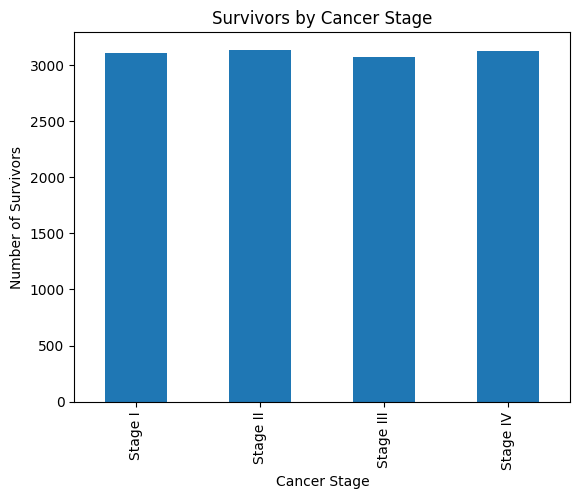

In [4]:
#Number of survivors for each cancer stage
df.groupby('cancer_stage')['survived'].sum().plot(kind='bar',xlabel='Cancer Stage',ylabel='Number of Survivors',title='Survivors by Cancer Stage')

<Axes: title={'center': 'Survivors by Smoking Status'}, xlabel='Smoking Status', ylabel='Number of Survivors'>

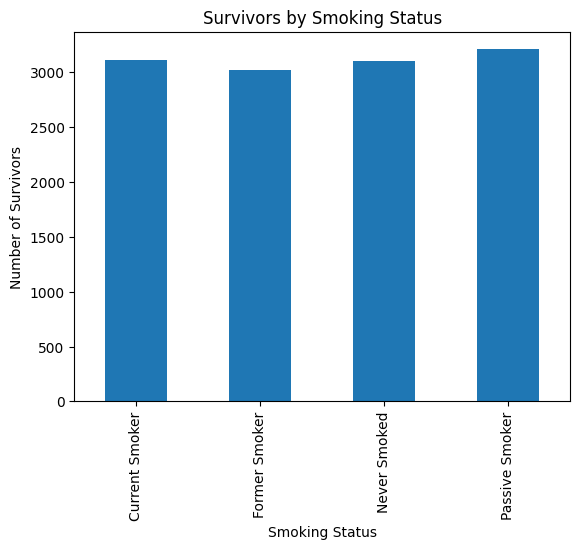

In [5]:
#Number of survivors for each smoking status
df.groupby('smoking_status')['survived'].sum().plot(kind='bar',xlabel='Smoking Status',ylabel='Number of Survivors',title='Survivors by Smoking Status')

<Axes: title={'center': 'Survivors by Family History'}, xlabel='Family History', ylabel='Number of Survivors'>

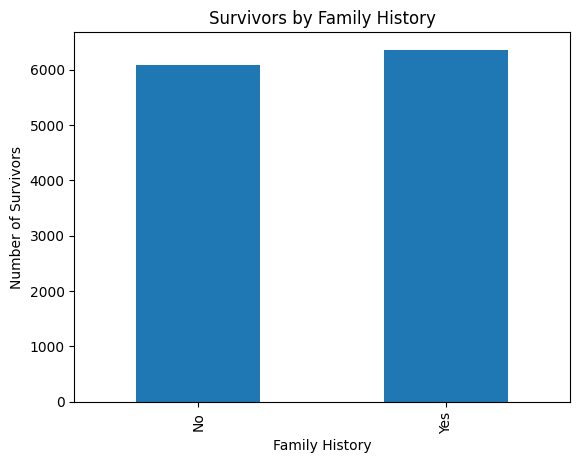

In [6]:
#Number of survivors by cancer family history
df.groupby('family_history')['survived'].sum().plot(kind='bar',xlabel='Family History',ylabel='Number of Survivors',title='Survivors by Family History')

<Axes: title={'center': 'Survivors by Gender'}, xlabel='Gender', ylabel='Number of Survivors'>

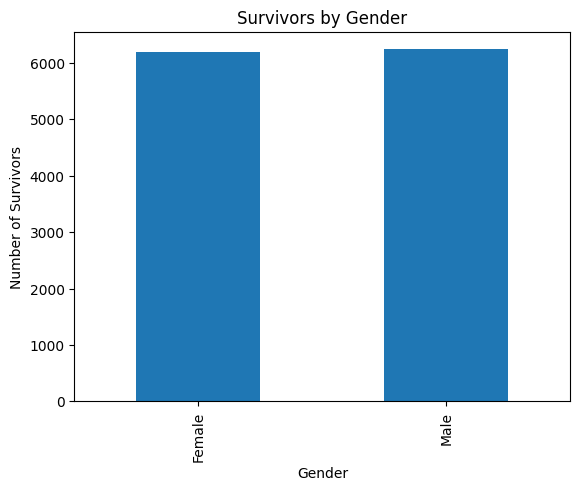

In [7]:
#Number of survivors by gender
df.groupby('gender')['survived'].sum().plot(kind='bar',xlabel='Gender',ylabel='Number of Survivors',title='Survivors by Gender')

In [8]:
#Descending Survival Rate by Treatment Type
SRbytreatment=df.groupby('treatment_type')['survived'].agg(total='count',survivors=lambda x:(x==1).sum())
SRbytreatment['survival rate']=SRbytreatment['survivors']/SRbytreatment['total']
SRbytreatment.sort_values('survival rate',ascending=False)

,total,survivors,survival rate
treatment_type,,,
Chemotherapy,14112,3189,0.225978
Combined,13899,3095,0.222678
Radiation,14074,3104,0.220549
Surgery,13915,3050,0.219188


In [9]:
#Descending Survival Rate by Country
SRbycountry=df.groupby('country')['survived'].agg(total='count',survivors=lambda x:(x==1).sum())
SRbycountry['survival rate']=SRbycountry['survivors']/SRbycountry['total']
SRbycountry.sort_values('survival rate',ascending=False)

,total,survivors,survival rate
country,,,
Hungary,2113,506,0.239470
Netherlands,2047,484,0.236444
Sweden,1989,459,0.230769
Denmark,2115,488,0.230733
Portugal,2098,484,0.230696
Czech Republic,2115,487,0.230260
France,2023,463,0.228868
Belgium,2018,460,0.227948
Estonia,2015,458,0.227295


In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,r2_score
labelencoder=LabelEncoder()
df['gender encoded']=labelencoder.fit_transform(df['gender'])
df['cancer stage encoded']=labelencoder.fit_transform(df['cancer_stage'])
df['family history encoded']=labelencoder.fit_transform(df['family_history'])
df['smoking status encoded']=labelencoder.fit_transform(df['smoking_status'])
df['treatment type encoded']=labelencoder.fit_transform(df['treatment_type'])
x=df[['age','gender encoded','cancer stage encoded','family history encoded','smoking status encoded','bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer']]
y=df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
confmatrix=confusion_matrix(y_test,y_pred)
classreport=classification_report(y_test,y_pred)
rquared=r2_score(y_test,y_pred)
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Confusion Matrix: ',confmatrix)
print('Classification Report: ',classreport)

Accuracy:  0.7757738095238095
Precision:  0.0
Confusion Matrix:  [[13033     0]
 [ 3767     0]]
Classification Report:                precision    recall  f1-score   support

           0       0.78      1.00      0.87     13033
           1       0.00      0.00      0.00      3767

    accuracy                           0.78     16800
   macro avg       0.39      0.50      0.44     16800
weighted avg       0.60      0.78      0.68     16800



C:\Users\jakey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jakey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jakey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predict

In [11]:
#Random Forest Classifier: builds trees independently using random subset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,r2_score
labelencoder=LabelEncoder()
df['gender encoded']=labelencoder.fit_transform(df['gender'])
df['cancer stage encoded']=labelencoder.fit_transform(df['cancer_stage'])
df['family history encoded']=labelencoder.fit_transform(df['family_history'])
df['smoking status encoded']=labelencoder.fit_transform(df['smoking_status'])
df['treatment type encoded']=labelencoder.fit_transform(df['treatment_type'])
x=df[['age','gender encoded','cancer stage encoded','family history encoded','smoking status encoded','bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer']]
y=df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
confmatrix=confusion_matrix(y_test,y_pred)
classreport=classification_report(y_test,y_pred)
rquared=r2_score(y_test,y_pred)
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Confusion Matrix: ',confmatrix)
print('Classification Report: ',classreport)

Accuracy:  0.7695238095238095
Precision:  0.21311475409836064
Confusion Matrix:  [[12889   144]
 [ 3728    39]]
Classification Report:                precision    recall  f1-score   support

           0       0.78      0.99      0.87     13033
           1       0.21      0.01      0.02      3767

    accuracy                           0.77     16800
   macro avg       0.49      0.50      0.44     16800
weighted avg       0.65      0.77      0.68     16800



In [12]:
#Random Forest Factors' Importance
rfimportance=pd.DataFrame()
rfimportance['variables']=x.columns
rfimportance['importance']=rf.feature_importances_
rfimportance.sort_values(by='importance',ascending=False)

,variables,importance
5,bmi,0.287138
6,cholesterol_level,0.261529
0,age,0.229232
2,cancer stage encoded,0.056331
4,smoking status encoded,0.054125
1,gender encoded,0.023882
8,asthma,0.022923
9,cirrhosis,0.021598
7,hypertension,0.017211
3,family history encoded,0.013203


In [13]:
#Gradient Boost: builds trees sequentially, correcting errors of previous one
from xgboost import XGBClassifier
labelencoder=LabelEncoder()
df['gender encoded']=labelencoder.fit_transform(df['gender'])
df['cancer stage encoded']=labelencoder.fit_transform(df['cancer_stage'])
df['family history encoded']=labelencoder.fit_transform(df['family_history'])
df['smoking status encoded']=labelencoder.fit_transform(df['smoking_status'])
df['treatment type encoded']=labelencoder.fit_transform(df['treatment_type'])
x=df[['age','gender encoded','cancer stage encoded','family history encoded','smoking status encoded','bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer']]
y=df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
confmatrix=confusion_matrix(y_test,y_pred)
classreport=classification_report(y_test,y_pred)
rquared=r2_score(y_test,y_pred)
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Confusion Matrix: ',confmatrix)
print('Classification Report: ',classreport)

Accuracy:  0.7724404761904762
Precision:  0.2358490566037736
Confusion Matrix:  [[12952    81]
 [ 3742    25]]
Classification Report:                precision    recall  f1-score   support

           0       0.78      0.99      0.87     13033
           1       0.24      0.01      0.01      3767

    accuracy                           0.77     16800
   macro avg       0.51      0.50      0.44     16800
weighted avg       0.65      0.77      0.68     16800



In [14]:
#Gradient Boost Factors' Importance
xgbimportance=pd.DataFrame()
xgbimportance['variables']=x.columns
xgbimportance['importance']=xgb.feature_importances_
xgbimportance.sort_values(by='importance',ascending=False)

,variables,importance
10,other_cancer,0.109038
9,cirrhosis,0.097851
5,bmi,0.094610
6,cholesterol_level,0.094005
4,smoking status encoded,0.091678
7,hypertension,0.088378
0,age,0.087616
1,gender encoded,0.086794
3,family history encoded,0.084775
2,cancer stage encoded,0.084148
